In [1]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Importing data

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
#Droping unnecessary columns
df_test.drop(['keyword','location'],axis = 1,inplace=True)

In [4]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


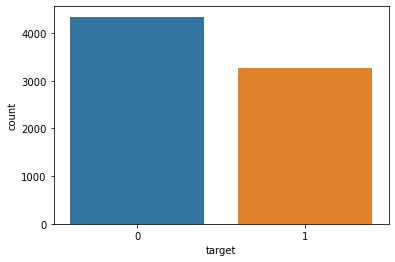

In [6]:
# df_train['target'].value_counts()
sns.countplot(df_train['target'])

In [7]:
df_train['keyword'].isnull().sum()

61

In [8]:
df_train['location'].isnull().sum()

2533

In [9]:
#Droping null data

df_train.drop(['id','keyword','location'],axis=1,inplace=True)

In [10]:
#Importing NLP
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Priyank\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
stemmer = LancasterStemmer()
corpus = []

In [12]:
#Cleaning the data

for i in range(0,df_train.shape[0]):

    Disaster = re.sub(pattern='[^a-zA-Z]',repl=" ",string=df_train.text[i])

    Disaster = Disaster.lower()

    Disaster = Disaster.split()

    Disaster = [stemmer.stem(words) for words in Disaster if not words in set(stopwords.words('english'))]

    Disaster = ' '.join(Disaster)

    corpus.append(Disaster)

In [13]:
corpus[0:10]

['dee reason earthquak may allah forg us',
 'forest fir near la rong sask canad',
 'resid ask shelt plac not off evacu shelt plac ord expect',
 'peopl receiv wildfir evacu ord californ',
 'got sent photo ruby alask smok wildfir pour school',
 'rockyfir upd californ hwy clos direct due lak county fir cafir wildfir',
 'flood disast heavy rain caus flash flood streets manitou colorado springs area',
 'top hil see fir wood',
 'emerg evacu hap build across street',
 'afraid tornado com are']

In [14]:
#Creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

In [15]:
CV = CountVectorizer()
X = CV.fit_transform(corpus).toarray()

In [16]:
y = pd.get_dummies(df_train['target'])
y = y.iloc[:, 1].values

In [17]:
#Spliting the data

from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [19]:
#Fitting the data in the model

from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train,y_train)

BernoulliNB()

In [20]:
#Predicting the Results

y_pred = classifier.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [22]:
cm = confusion_matrix(y_test,y_pred)

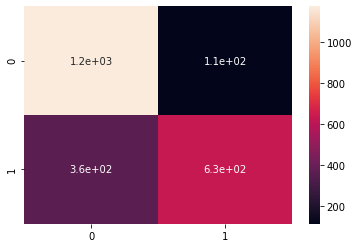

In [25]:
#Heat map
sns.heatmap(cm,annot=True)

In [26]:
score = accuracy_score(y_test, y_pred)
print('The Accurecy of this model is',round(score*100,2))

The Accurecy of this model is 79.07


In [27]:
#Predicting the results on the test data

test_corpus = []
for i in range(0,df_test.shape[0]):

    Disaster = re.sub(pattern='[^a-zA-Z]',repl=" ",string=df_test.text[i])

    Disaster = Disaster.lower()

    Disaster = Disaster.split()

    Disaster = [stemmer.stem(words) for words in Disaster if not words in set(stopwords.words('english'))]

    Disaster = ' '.join(Disaster)

    test_corpus.append(Disaster)

In [28]:
#Creating bag of words

X_test = CV.transform(test_corpus).toarray()

In [29]:
#Predicting

y_pred = classifier.predict(X_test)

In [31]:
#Storing results in DataFrame

Submission = pd.DataFrame(data = y_pred, columns = ['target'])
Submission.head()

,target
0,0
1,0
2,1
3,0
4,1
